# Week 7 - An introduction to Machine Learning (PART 2)

Please write questions on the chat.

### Motivation

> Continuation of last week's lecture on ML regression techniques to classification: first we'll look at the classic MNIST digit recognition problem, introducing cross validation and hyperparameter search along the way.

### Aims

- Exploration of our knowledge about classifiers - Decision Trees and Random Forests based on the [Digits dataset](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)
    - advantages and disadvantages
    - reviewing the basics of how they work
- How we can be more systematic about how we pick the final model
    - preprocessing
    - performance metrics
    - hyperparameters
    - automation of the best model selection
- Introduction to the homework with a hands-on with data based on a [nature machine intelligence](https://www.nature.com/natmachintell/) paper, ["An interpretable mortality prediction model for COVID-19 patients"](https://www.nature.com/articles/s42256-020-0180-7).

- *If we have enough time - talk about key differences between Machine Learning, Deep Learning and Artificial Intelligence buzzwords

### **0. Setup**

Refer to setup instructions from PART 1.

### **1. CART**

In [50]:
# build classifier based on MNIST dataset
# target: at least 97% (based on the test set results)

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

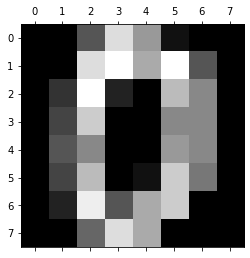

In [51]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [52]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [53]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


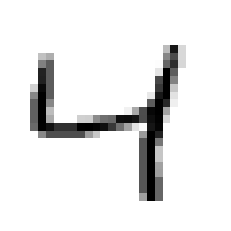

In [54]:
import matplotlib.pyplot as plt 
some_digit=X[2]
some_digit_image=some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [55]:
y[2]

'4'

In [56]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

(array([5421., 5923., 5842., 6742., 5949., 5958., 6131., 5918., 6265.,
        5851.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

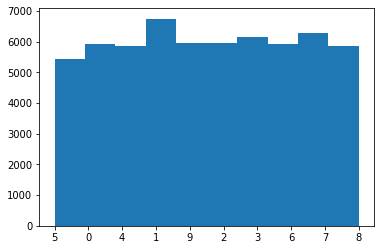

In [46]:
plt.hist(y_train)

In [57]:
y_train_4 = (y_train=='4')
y_test_4 = (y_test=='4')

In [58]:
from sklearn.tree import DecisionTreeClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train_4)

DecisionTreeClassifier(random_state=42)

In [49]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_211 <= 0.50
|   |--- feature_400 <= 7.50
|   |   |--- feature_402 <= 146.50
|   |   |   |--- feature_426 <= 203.50
|   |   |   |   |--- feature_375 <= 196.50
|   |   |   |   |   |--- feature_401 <= 130.00
|   |   |   |   |   |   |--- feature_424 <= 217.00
|   |   |   |   |   |   |   |--- feature_452 <= 254.50
|   |   |   |   |   |   |   |   |--- feature_374 <= 123.50
|   |   |   |   |   |   |   |   |   |--- feature_348 <= 134.50
|   |   |   |   |   |   |   |   |   |   |--- feature_399 <= 147.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_399 >  147.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_348 >  134.50
|   |   |   |   |   |   |   |   |   |   |--- feature_710 <= 253.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- feature_710 >

In [50]:
model.predict([some_digit])

array([ True])

In [51]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train_4, cv=3, scoring='accuracy')

array([0.9684 , 0.96805, 0.97145])

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_4):
  clone_clf = clone(model)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_4[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_4[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.9693
0.96945
0.96905


In [62]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(model, X_train, y_train_4, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_4, y_train_pred)

array([[53210,   948],
       [  894,  4948]])

In [56]:
y_train_perfect_predictions = y_train_4

confusion_matrix(y_train_4, y_train_perfect_predictions)

array([[54158,     0],
       [    0,  5842]])

In [59]:
res = model.predict(X_test)

In [69]:
len(y_test_4)

10000

In [66]:
sum(y_test_4)

982

In [68]:
len(res)

10000

In [70]:
sum(res == y_test_4)/len(res)

0.976

In [71]:
from sklearn.model_selection import GridSearchCV

params = [{'criterion':['gini', 'entropy'], 
           'max_depth':[5,10,20,25,30]}]

model = DecisionTreeClassifier(random_state=42)

dt = GridSearchCV(model,
                   params,
                   cv=3,
                   scoring="accuracy", 
                   return_train_score=True)

dt.fit(X_train, y_train_4)



GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                    

In [72]:
dt.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [73]:
scores = cross_val_score(dt,
                         X_train, y_train_4,
                         scoring="accuracy",
                         cv=3)
scores

array([0.9746, 0.9764, 0.9735])

In [ ]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [75]:
res = dt.predict(X_test)
sum(res == y_test_4)/len(res)

0.9809

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

params = [{'criterion':['entropy'], 
           'max_depth':[20],
           'n_estimators':[100,150,200,250]}]

model = ensemble.RandomForestClassifier(random_state=42)

dt = RandomizedSearchCV(model,
                   params,
                   cv=3,
                   scoring="accuracy", 
                   return_train_score=True)

dt.fit(X_train, y_train_4)

dt.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}

In [77]:
dt.cv_results_

{'mean_fit_time': array([ 9.0590051 , 17.92524489, 26.7779355 , 35.73843972]),
 'mean_score_time': array([0.26195256, 0.48944783, 0.71003628, 0.94554202]),
 'mean_test_score': array([0.98803333, 0.98855   , 0.9889    , 0.98898333]),
 'mean_train_score': array([0.99999167, 1.        , 1.        , 1.        ]),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'entropy', 'entropy'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[20, 20, 20, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 150, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50},
  {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100},
  {'criterion': 'entropy', 'max_depth': 20,

In [80]:
scores = cross_val_score(dt,
                         X_train, y_train_4,
                         scoring="accuracy",
                         cv=3)
scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


array([0.9901 , 0.98825, 0.98885])

In [79]:
res = dt.predict(X_test)
sum(res == y_test_4)/len(res)

0.9893

In [83]:
from sklearn import metrics

print(f"Classification report for classifier {dt}:\n"
      f"{metrics.classification_report(y_test_4, res)}\n")

Classification report for classifier RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weig

### **2. Tuning of previous models**

In [19]:
import pandas as pd
import numpy as np
metabric = pd.read_csv("https://raw.githubusercontent.com/semacu/202105-data-science-python/main/data/metabric_clinical_and_expression_data.csv").dropna() # NA drop
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import GridSearchCV

lin_reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(metabric["Tumour_size"],
                                                    metabric["Survival_time"], 
                                                    test_size=.2, 
                                                    random_state=42)

lin_reg.fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))

y_predicted = lin_reg.predict(X_test.to_numpy().reshape(-1,1))

lin_reg_l1 = Ridge()
lin_reg_l2 = Lasso()
lin_reg_l1_l2 = ElasticNet()

params = [{'alpha':[0.0001, 0.5, 0.75, 1, 10]}]

model_lin_reg_l1 = GridSearchCV(lin_reg_l1,
                   params,
                   cv=3,
                   scoring="r2", 
                   return_train_score=True)

model_lin_reg_l2 = GridSearchCV(lin_reg_l1,
                   params,
                   cv=3,
                   scoring="r2", 
                   return_train_score=True)

model_lin_reg_l1_l2 = GridSearchCV(lin_reg_l1,
                   params,
                   cv=3,
                   scoring="r2", 
                   return_train_score=True)

model_lin_reg_l1.fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))

model_lin_reg_l2.fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))

model_lin_reg_l1_l2.fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))

res_model_lin_reg_l1 = model_lin_reg_l1.predict(X_test.to_numpy().reshape(-1,1))

res_model_lin_reg_l2 = model_lin_reg_l2.predict(X_test.to_numpy().reshape(-1,1))

res_model_lin_reg_l1_l2 = model_lin_reg_l1_l2.predict(X_test.to_numpy().reshape(-1,1))

In [20]:
print("MSE:", mean_squared_error(y_test, res_model_lin_reg_l1))
print("SQUARE ROOT MSE: ", math.sqrt(mean_squared_error(y_test, res_model_lin_reg_l1)))

MSE: 5507.969464073485
SQUARE ROOT MSE:  74.215695537221


In [21]:
print("MSE:", mean_squared_error(y_test, res_model_lin_reg_l2))
print("SQUARE ROOT MSE: ", math.sqrt(mean_squared_error(y_test, res_model_lin_reg_l2)))

MSE: 5507.969464073485
SQUARE ROOT MSE:  74.215695537221


In [22]:
print("MSE:", mean_squared_error(y_test, res_model_lin_reg_l1_l2))
print("SQUARE ROOT MSE: ", math.sqrt(mean_squared_error(y_test, res_model_lin_reg_l1_l2)))

MSE: 5507.969464073485
SQUARE ROOT MSE:  74.215695537221


In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
import sklearn; sklearn.show_versions()


System:
    python: 3.7.12 (default, Sep 10 2021, 00:21:48)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 21.1.3
setuptools: 57.4.0
   sklearn: 0.23.0
     numpy: 1.19.5
     scipy: 1.4.1
    Cython: 0.29.24
    pandas: 1.1.5
matplotlib: 3.2.2
    joblib: 1.1.0

Built with OpenMP: True


In [99]:
!pip install 'scikit-learn==0.23'

     |████████████████████████████████| 7.3 MB 4.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [23]:
X = metabric.loc[:, ["ER_status", "Cancer_type", "Tumour_size"]]
y = metabric["Survival_time"]

label_transformer = OneHotEncoder(drop='if_binary')

preprocessor = ColumnTransformer(transformers=[('labels', 
                                                label_transformer, 
                                                ['ER_status', 
                                                 'Cancer_type']),],
                                 remainder='passthrough')

preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=42)

params = [{'alpha':[0.0001, 0.5, 0.75, 1, 10]}]

model_lin_reg_l1 = GridSearchCV(lin_reg_l1,
                   params,
                   cv=3,
                   scoring="r2", 
                   return_train_score=True)

model_lin_reg_l2 = GridSearchCV(lin_reg_l2,
                   params,
                   cv=3,
                   scoring="r2", 
                   return_train_score=True)

model_lin_reg_l1_l2 = GridSearchCV(lin_reg_l1_l2,
                   params,
                   cv=3,
                   scoring="r2", 
                   return_train_score=True)

pipeline_l1 = Pipeline(steps=[('preprocessor', 
                            preprocessor), 
                           ('model', 
                            model_lin_reg_l1)])

pipeline_l2 = Pipeline(steps=[('preprocessor', 
                            preprocessor), 
                           ('model', 
                            model_lin_reg_l2)])

pipeline_l1_l2 = Pipeline(steps=[('preprocessor', 
                            preprocessor), 
                           ('model', 
                            model_lin_reg_l1_l2)])

pipeline_l1.fit(X_train, y_train)
pipeline_l2.fit(X_train, y_train)
pipeline_l1_l2.fit(X_train, y_train)

res_model_lin_reg_l1 = pipeline_l1.predict(X_test)
res_model_lin_reg_l2 = pipeline_l2.predict(X_test)
res_model_lin_reg_l1_l2 = pipeline_l1_l2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5435.756817178801, tolerance: 348.47512509140046
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1450315.6028378108, tolerance: 358.21011321309277
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1398636.4001931918, tolerance: 348.47512509140046
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684952.

In [24]:
print("MSE:", mean_squared_error(y_test, res_model_lin_reg_l1))
print("SQUARE ROOT MSE: ", math.sqrt(mean_squared_error(y_test, res_model_lin_reg_l1)))

MSE: 5432.85898074978
SQUARE ROOT MSE:  73.7079302432905


In [25]:
print("MSE:", mean_squared_error(y_test, res_model_lin_reg_l2))
print("SQUARE ROOT MSE: ", math.sqrt(mean_squared_error(y_test, res_model_lin_reg_l2)))

MSE: 5447.94064957882
SQUARE ROOT MSE:  73.81016630233819


In [26]:
print("MSE:", mean_squared_error(y_test, res_model_lin_reg_l1_l2))
print("SQUARE ROOT MSE: ", math.sqrt(mean_squared_error(y_test, res_model_lin_reg_l1_l2)))

MSE: 5426.975786195076
SQUARE ROOT MSE:  73.66801060294132


In [33]:
names = ["ER_status_binary",
                     "Cancer_type_Breast Invasive Ductal Carcinoma",
                     "Cancer_type_Breast Mixed Ductal and Lobular Carcinoma",
                     "Cancer_type_Breast Invasive Lobular Carcinoma",
                     "Cancer_type_Breast Invasive Mixed Mucinous Carcinoma",
                     "Cancer_type_Breast",  
                     "Tumour_size"]

['ER_status_binary',
 'Cancer_type_Breast Invasive Ductal Carcinoma',
 'Cancer_type_Breast Mixed Ductal and Lobular Carcinoma',
 'Cancer_type_Breast Invasive Lobular Carcinoma',
 'Cancer_type_Breast Invasive Mixed Mucinous Carcinoma',
 'Cancer_type_Breast',
 'Tumour_size']

In [46]:
model_lin_reg_l1.best_estimator_.coef_

array([13.48070072, 10.42976214, -5.54107336,  3.05422825, -4.61338965,
       -3.32952738, -1.07715052])

In [47]:
model_lin_reg_l2.best_estimator_.coef_

array([11.75935124,  0.        , -2.16450049,  0.        , -0.        ,
       -0.        , -1.06639997])

In [48]:
model_lin_reg_l1_l2.best_estimator_.coef_

array([ 14.30544428,  40.62962802,  -9.35274671,  -0.31196142,
       -12.35373031,  -7.510094  ,  -1.07697904])

### **3. Exercises**

Data based on a [nature machine intelligence](https://www.nature.com/natmachintell/) paper, ["An interpretable mortality prediction model for COVID-19 patients"](https://www.nature.com/articles/s42256-020-0180-7).

1. Split data into training and test sets.
2. Fit a RandomForestClassifier on the training set.
3. Evaluate the classifier performance by calculating the confusion matrix and the F1 score on the test set. ( https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter )
4. Plot the feature importances of the fitted classifier (this is basically the main finding of the Nature paper).
5. Try running a different type of classifier (i.e. Support Vector Machines) and/or see how well you can do on the test set by tuning hyperparameters using cross-validation, grid search or otherwise.